In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
census=pd.read_csv(r"C:\Users\hp\Downloads\archive (21)\adult.csv")

In [3]:
census.head

<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [10]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
census.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
census.loc[census.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [15]:
census = census.drop_duplicates()

In [16]:
census.loc[census.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [17]:
census['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

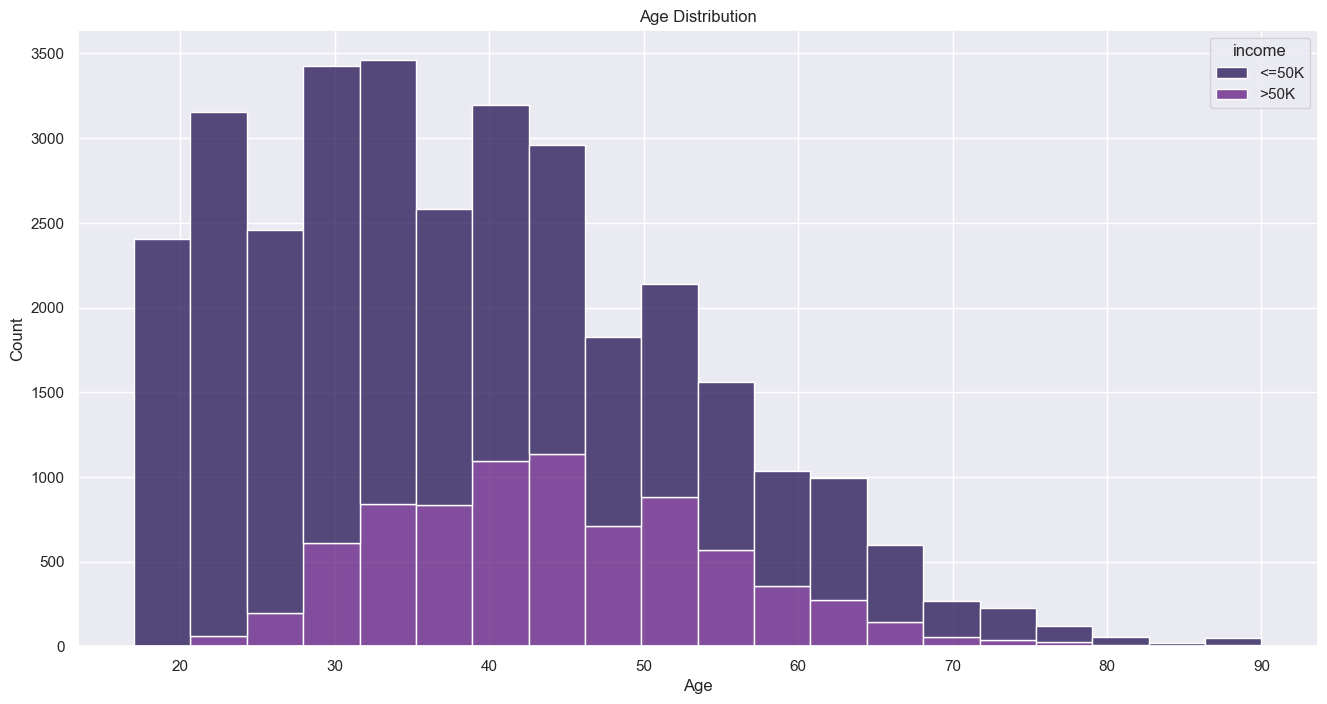

In [18]:
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
sns.histplot(data=census, x='age', hue='income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [19]:
census.groupby('workclass').size()

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22673
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
dtype: int64

**age distribution for workclass "?"** 
 count    1836.000000
mean       40.960240
std        20.334587
min        17.000000
25%        21.000000
50%        35.000000
75%        61.000000
max        90.000000
Name: age, dtype: float64


<Axes: title={'center': 'age distribution for workclass "?"'}, xlabel='age', ylabel='Count'>

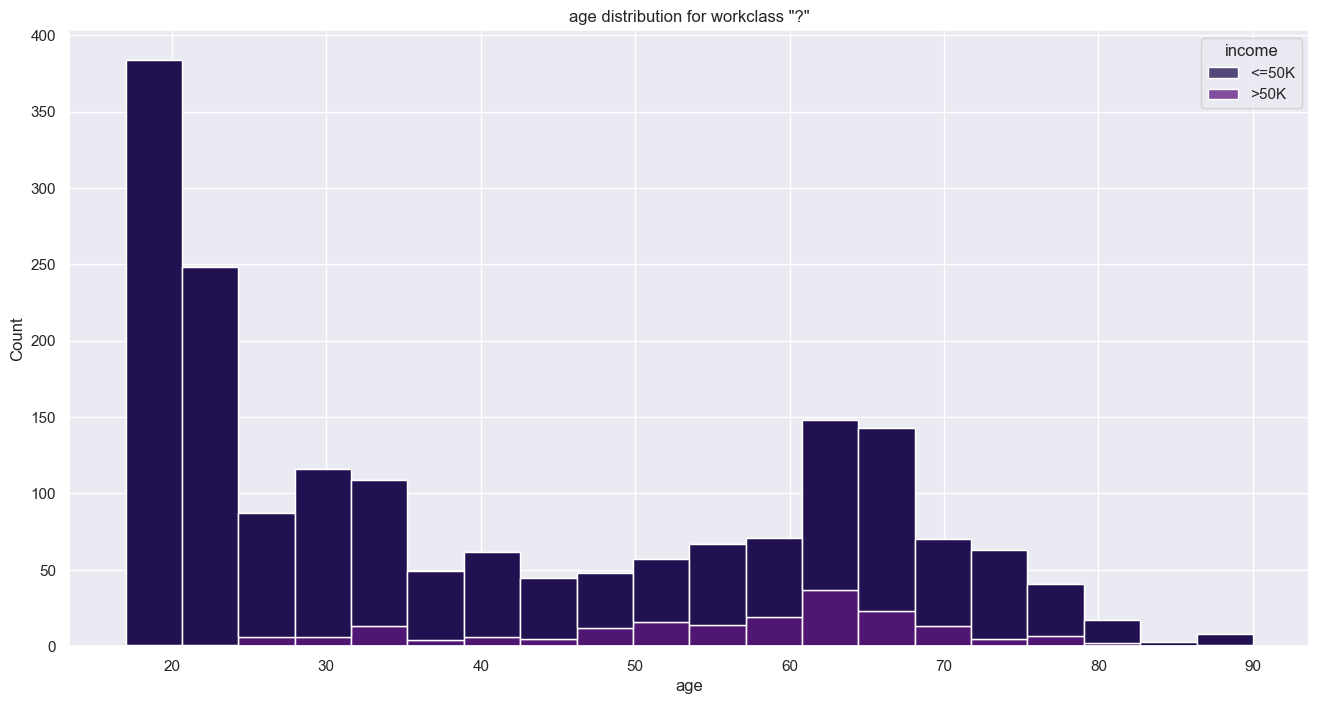

In [22]:
workclass_unknown = census.loc[census['workclass'] == '?']
print('**age distribution for workclass "?"** \n', workclass_unknown['age'].describe())
plt.figure(figsize=(16, 8))
plt.title('age distribution for workclass "?"')
plt.hist(workclass_unknown['age'], bins=20)
sns.histplot(data=census.loc[census['workclass'] == '?'], x='age', hue='income', bins=20, multiple='stack')

In [23]:
print(census.query('age < 20').groupby('workclass').size())
print(census.query('age > 20 and age < 60').groupby('workclass').size())
print(census.query('age > 60').groupby('workclass').size())

workclass
?                    269
Federal-gov            9
Local-gov             35
Never-worked           4
Private             1249
Self-emp-inc          16
Self-emp-not-inc      37
State-gov             32
Without-pay            2
dtype: int64
workclass
?                     928
Federal-gov           874
Local-gov            1875
Never-worked            2
Private             19599
Self-emp-inc          940
Self-emp-not-inc     2108
State-gov            1158
Without-pay             5
dtype: int64
workclass
?                    493
Federal-gov           58
Local-gov            151
Private             1070
Self-emp-inc         143
Self-emp-not-inc     338
State-gov             71
Without-pay            7
dtype: int64


In [24]:
census.loc[census['workclass'] == '?', 'workclass'] = 'Private'
census.loc[census['workclass'] == '?' ]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


Text(0.5, 1.0, 'Workclass')

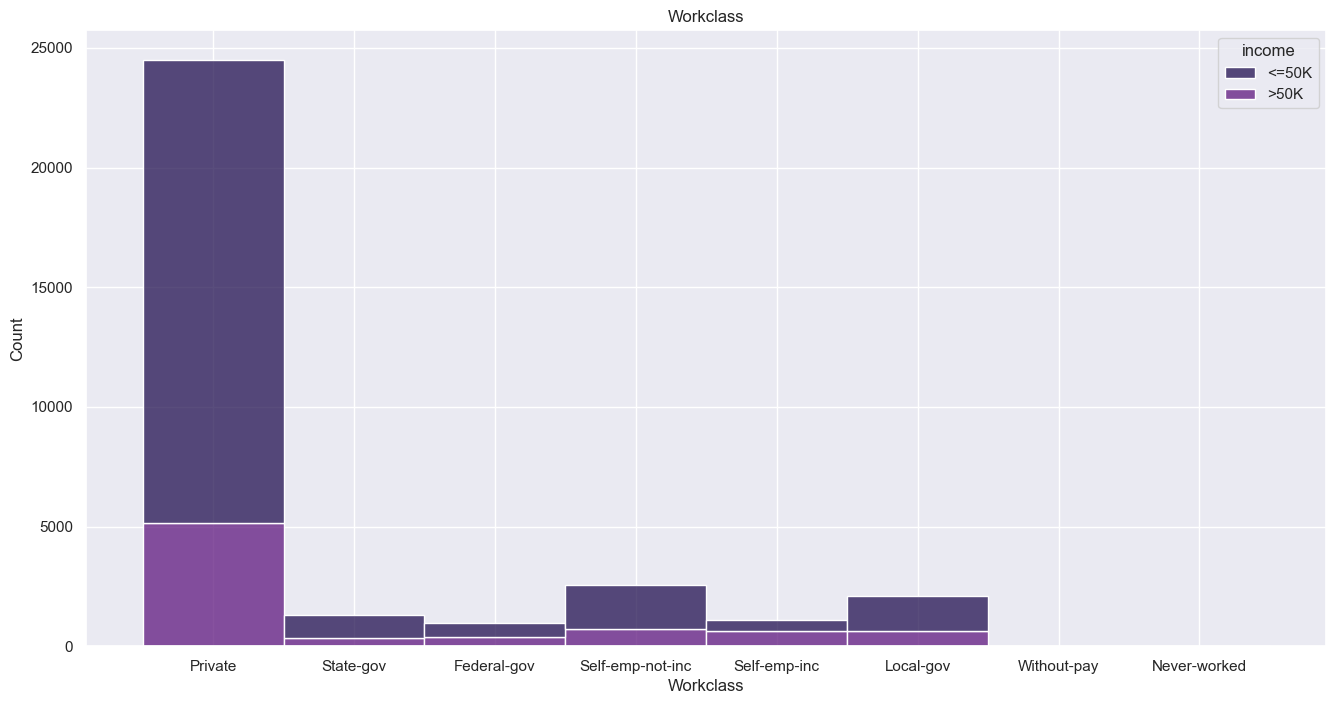

In [25]:
plt.figure(figsize=(16, 8))
sns.histplot(data=census, x='workclass', hue='income', multiple='stack')
plt.xlabel('Workclass')
plt.title('Workclass')

In [26]:
census.groupby(census['workclass']).size()

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             24509
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
dtype: int64

In [27]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Text(0.5, 0, 'Final Weight')

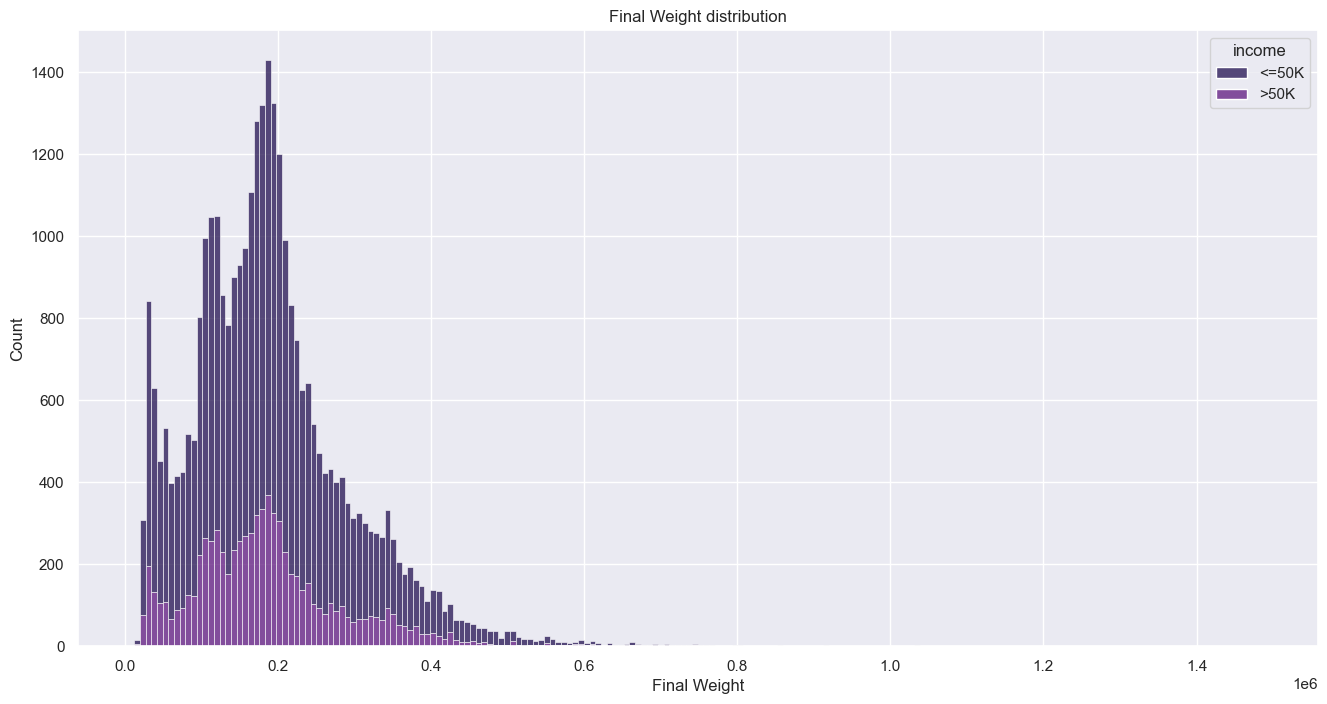

In [28]:
plt.figure(figsize=(16, 8))
sns.histplot(x='fnlwgt', data=census, hue='income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')

In [29]:
census.groupby('education').size()

education
10th              933
11th             1175
12th              433
1st-4th           166
5th-6th           332
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10494
Masters          1722
Preschool          50
Prof-school       576
Some-college     7282
dtype: int64

([<matplotlib.patches.Wedge at 0x28e5e31a010>,
 [Text(1.0955395671296693, 0.09895987496625551, '10th'),
  Text(1.05292201745472, 0.31836335398265037, '11th'),
  Text(0.9910262495685971, 0.4773541375813149, '12th'),
  Text(0.9617762876810843, 0.5338411490831262, '1st-4th'),
  Text(0.9350052562783607, 0.5794524749553126, '5th-6th'),
  Text(0.8762672392481279, 0.6649479118099886, '7th-8th'),
  Text(0.7965293158854829, 0.7586442176244439, '9th'),
  Text(0.6719068697653994, 0.87094268374105, 'Assoc-acdm'),
  Text(0.4491787546624215, 1.0041107739487294, 'Assoc-voc'),
  Text(-0.2504055487350647, 1.071119536355626, 'Bachelors'),
  Text(-0.7785868926457221, 0.7770472640710339, 'Doctorate'),
  Text(-1.0605252834929717, -0.2920378795159155, 'HS-grad'),
  Text(-0.13449613832544505, -1.091746668772359, 'Masters'),
  Text(0.05334950660702595, -1.0987055247630217, 'Preschool'),
  Text(0.11962081577950918, -1.0934765020027841, 'Prof-school'),
  Text(0.8391187061846062, -0.7112522737616188, 'Some-colle

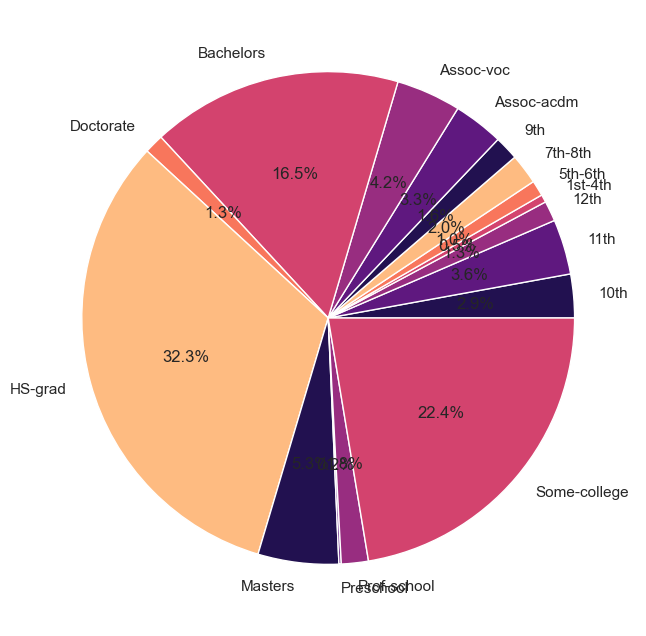

In [30]:
plt.figure(figsize=(16, 8))
plt.pie(census.groupby('education').size(), labels=census.groupby('education').size().index, autopct='%1.1f%%')

<Axes: xlabel='education', ylabel='count'>

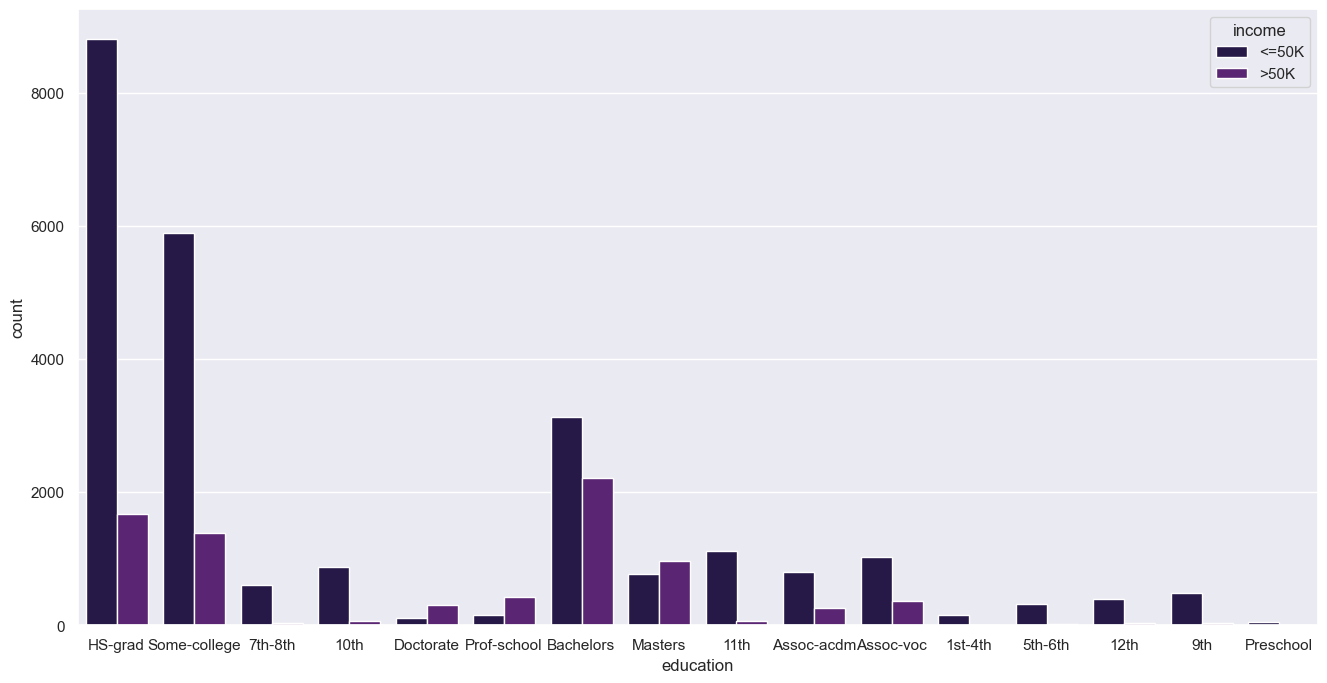

In [31]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=census, hue='income')

In [32]:
census.groupby('education.num').size()

education.num
1        50
2       166
3       332
4       645
5       514
6       933
7      1175
8       433
9     10494
10     7282
11     1382
12     1067
13     5353
14     1722
15      576
16      413
dtype: int64

In [33]:
census['education.num'].describe()

count    32537.000000
mean        10.081815
std          2.571633
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

<Axes: xlabel='education.num', ylabel='count'>

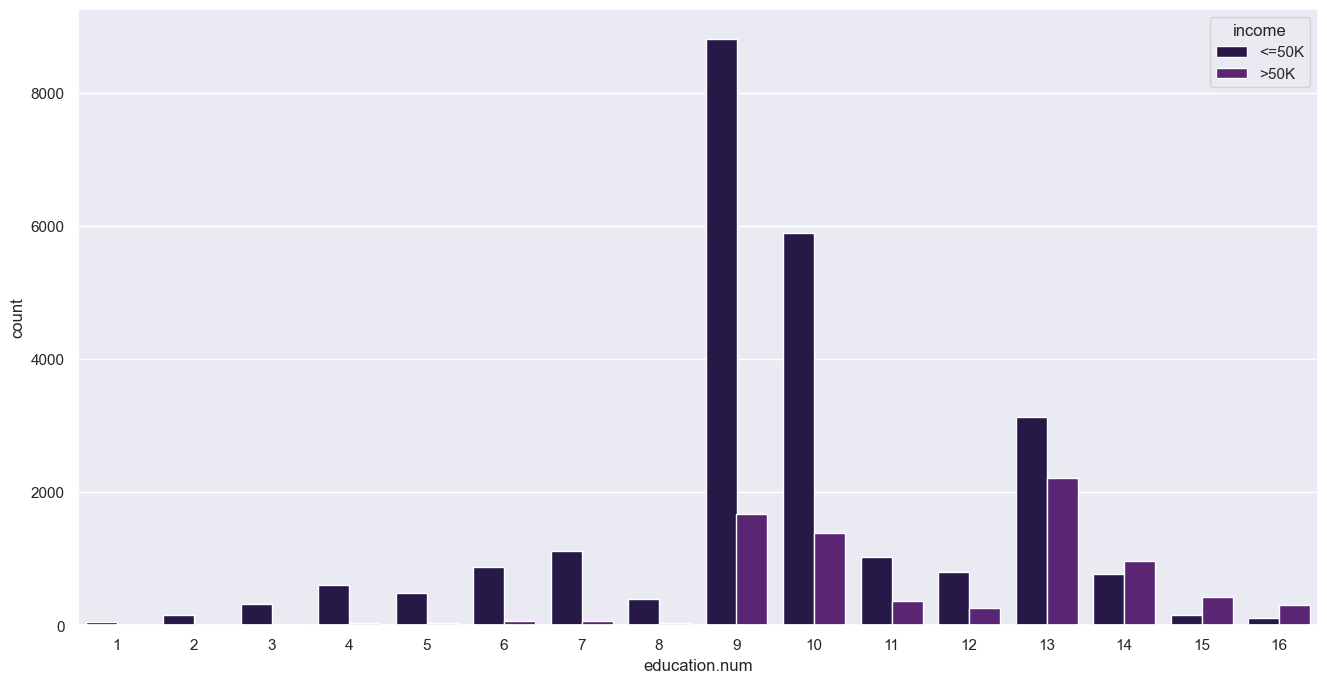

In [34]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education.num', data=census, hue='income')

marital.status
Divorced                  4441
Married-AF-spouse           23
Married-civ-spouse       14970
Married-spouse-absent      418
Never-married            10667
Separated                 1025
Widowed                    993
dtype: int64


<Axes: xlabel='marital.status', ylabel='count'>

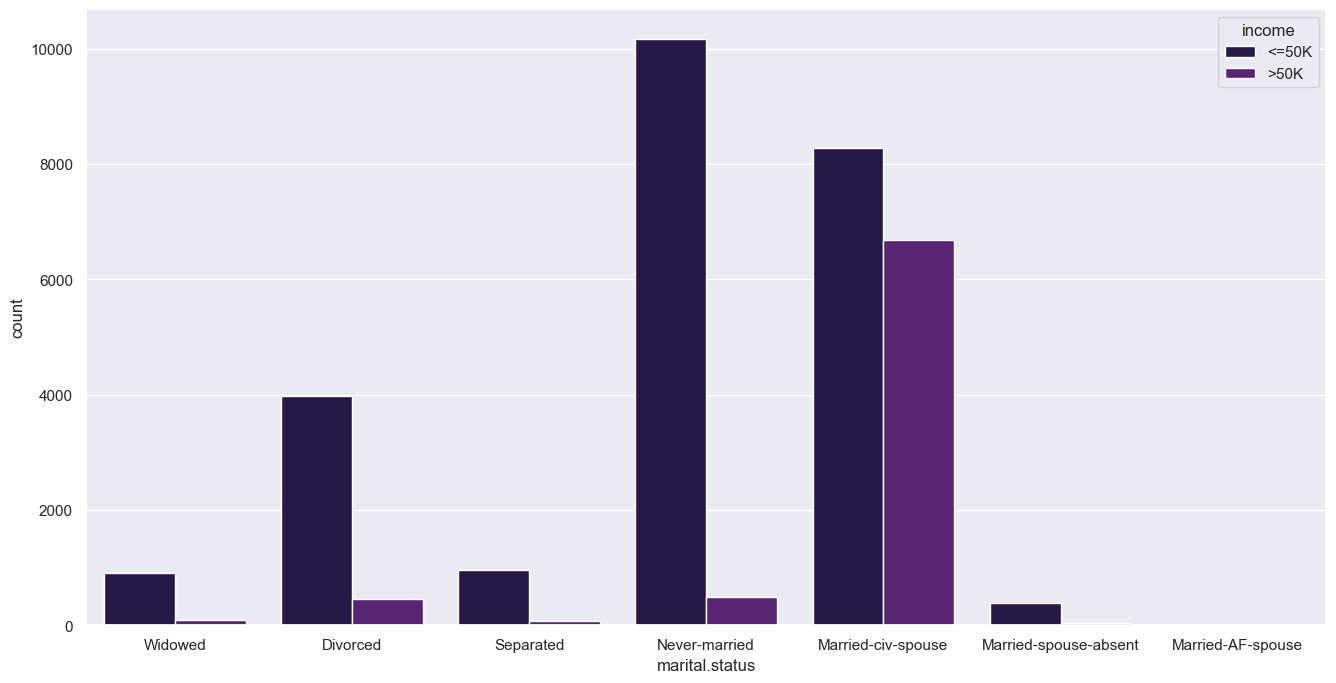

In [35]:
print(census.groupby('marital.status').size())
plt.figure(figsize=(16, 8))
sns.countplot(data=census, x='marital.status', hue='income')

occupation
?                    1843
Adm-clerical         3768
Armed-Forces            9
Craft-repair         4094
Exec-managerial      4065
Farming-fishing       992
Handlers-cleaners    1369
Machine-op-inspct    2000
Other-service        3291
Priv-house-serv       147
Prof-specialty       4136
Protective-serv       649
Sales                3650
Tech-support          927
Transport-moving     1597
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

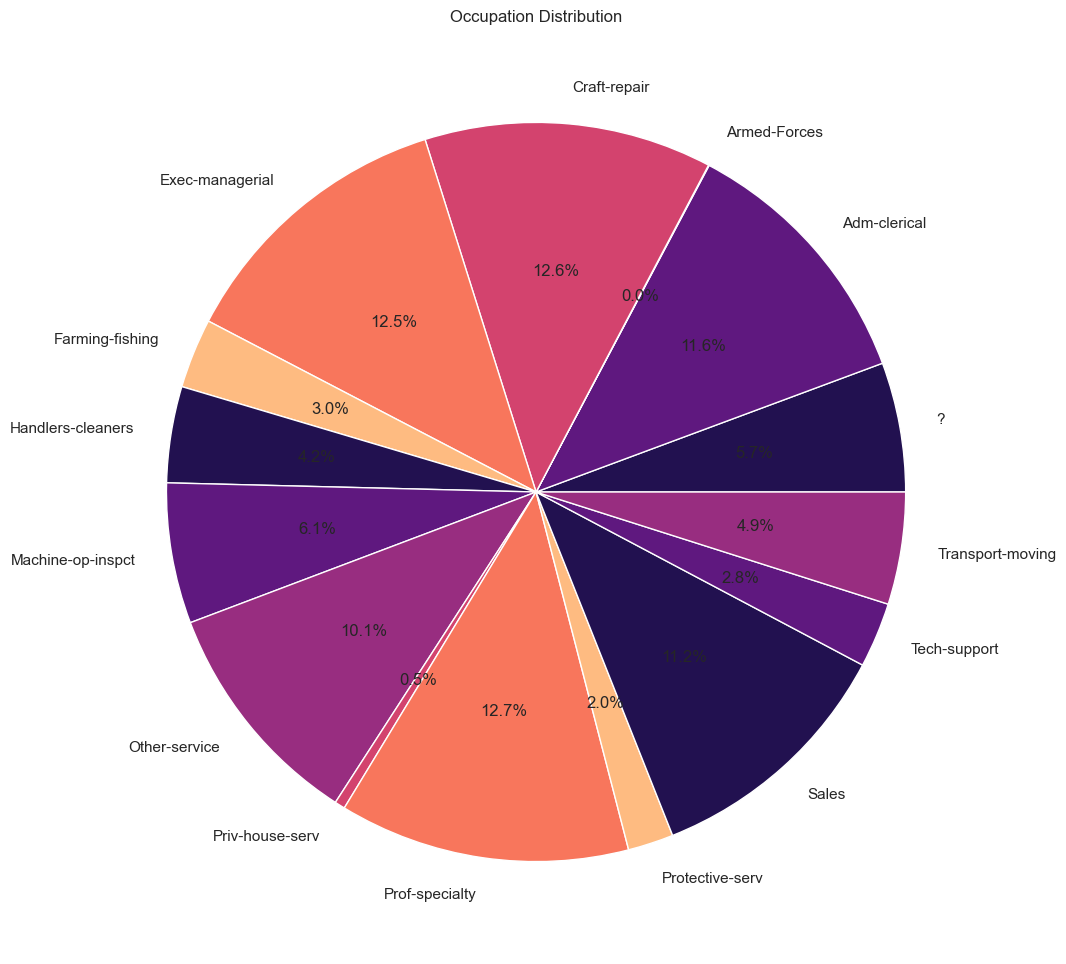

In [37]:
print(census.groupby('occupation').size())
plt.figure(figsize=(16, 12))
plt.pie(census.groupby('occupation').size(), labels=census.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Occupation Distribution')

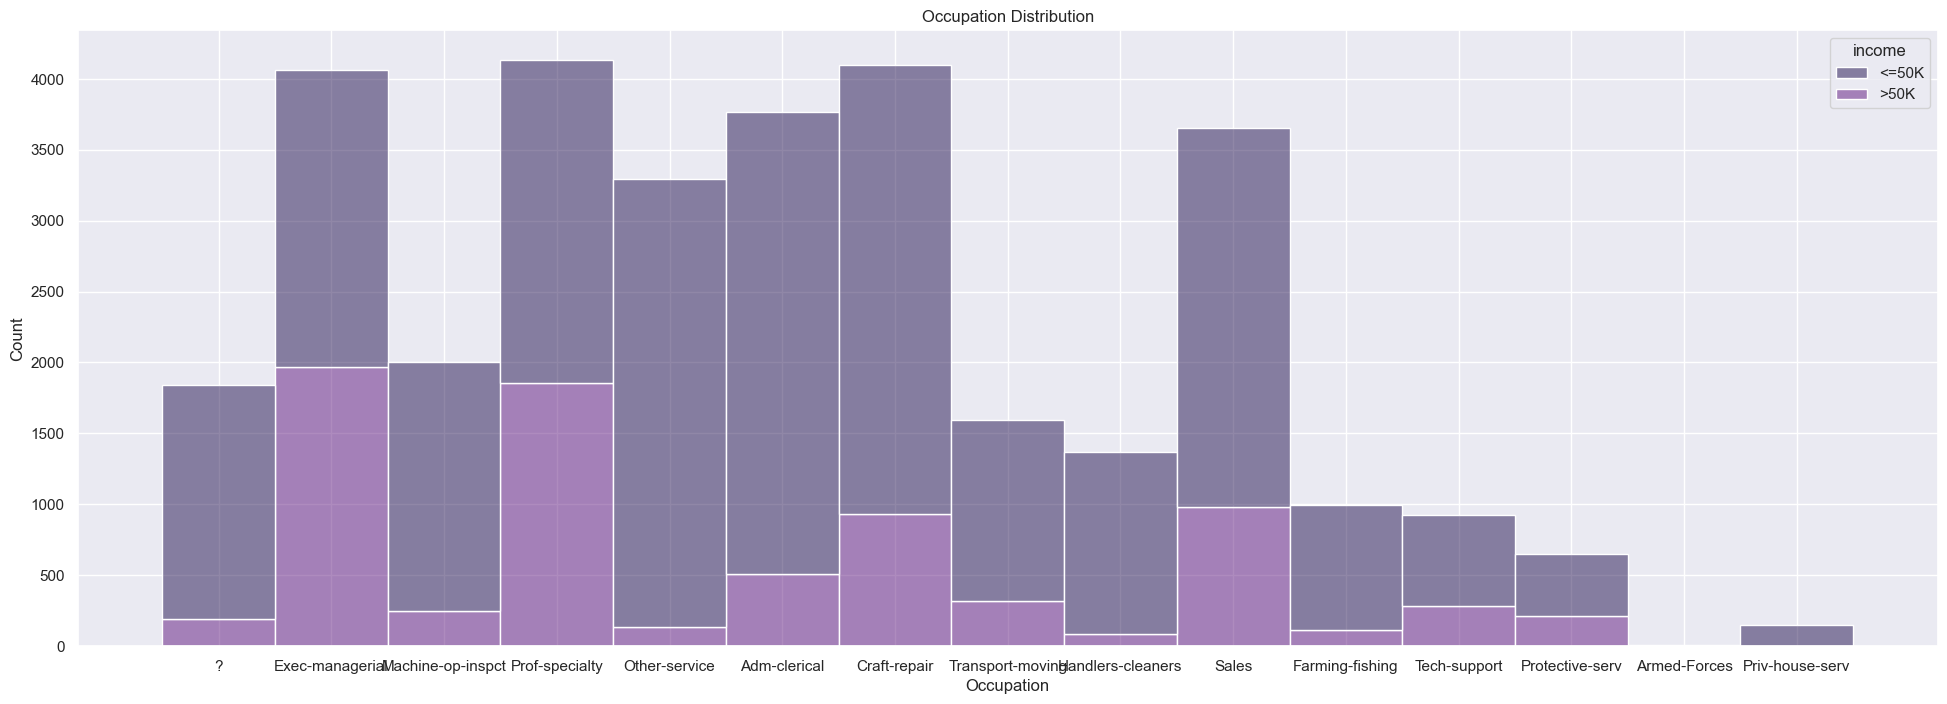

In [38]:
plt.figure(figsize=(24, 8))
sns.histplot(data=census, x='occupation', hue='income', multiple='stack', alpha=0.5)
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

In [39]:
census.drop(census.loc[census['occupation'] == '?'].index, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18400\3261642966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census.drop(census.loc[census['occupation'] == '?'].index, inplace=True)


Text(0.5, 1.0, 'Occupation Distribution')

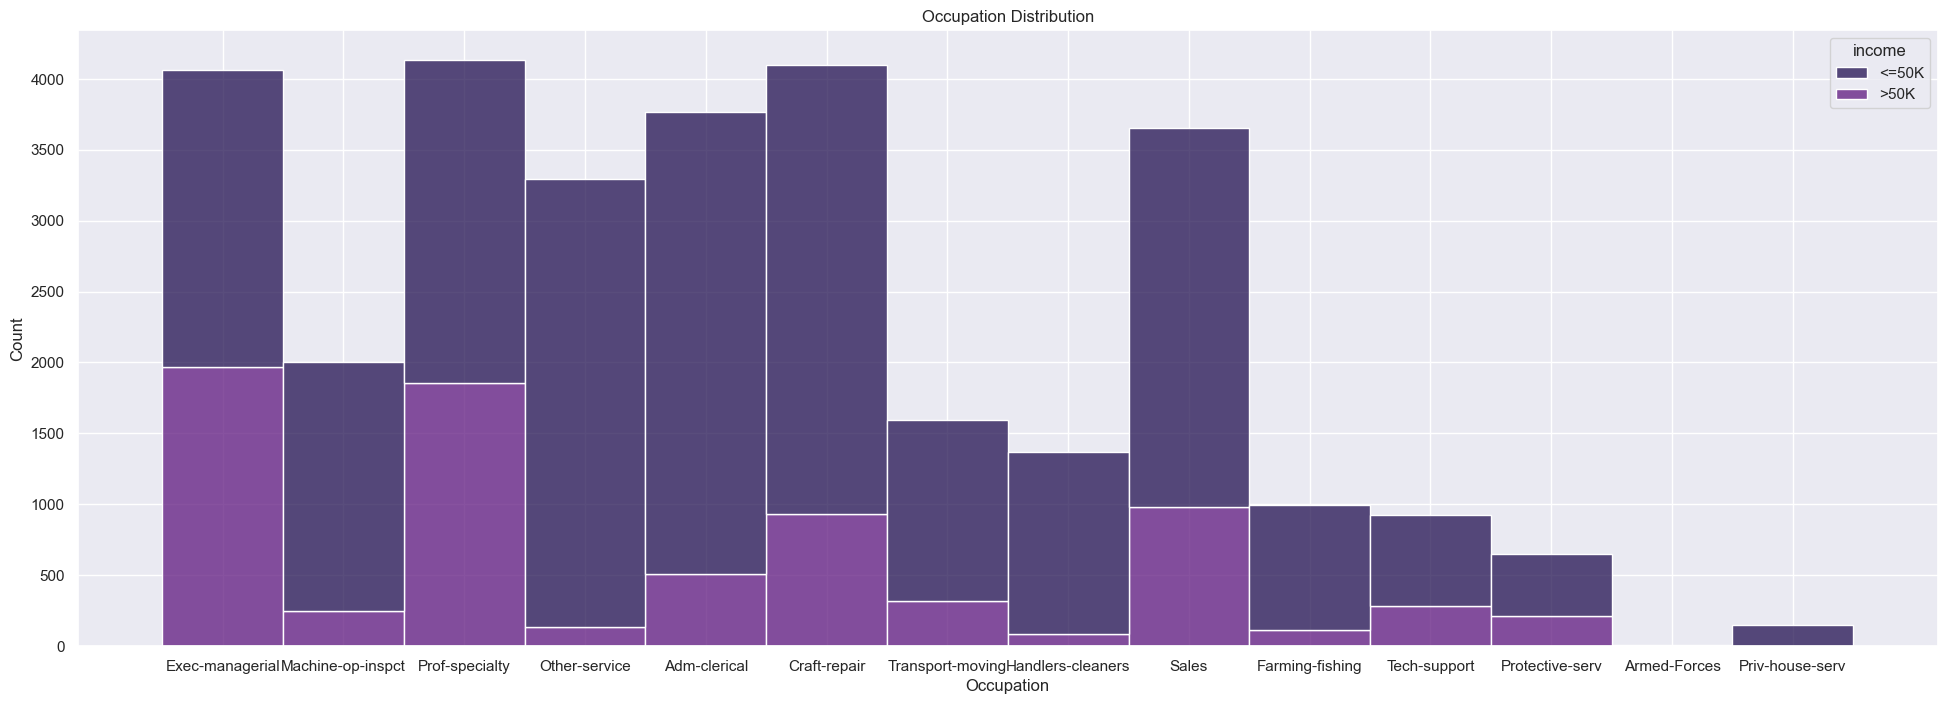

In [40]:
plt.figure(figsize=(24, 8))
sns.histplot(data=census, x='occupation', hue='income', multiple='stack')
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

relationship
Husband           12698
Not-in-family      7852
Other-relative      918
Own-child          4521
Unmarried          3270
Wife               1435
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

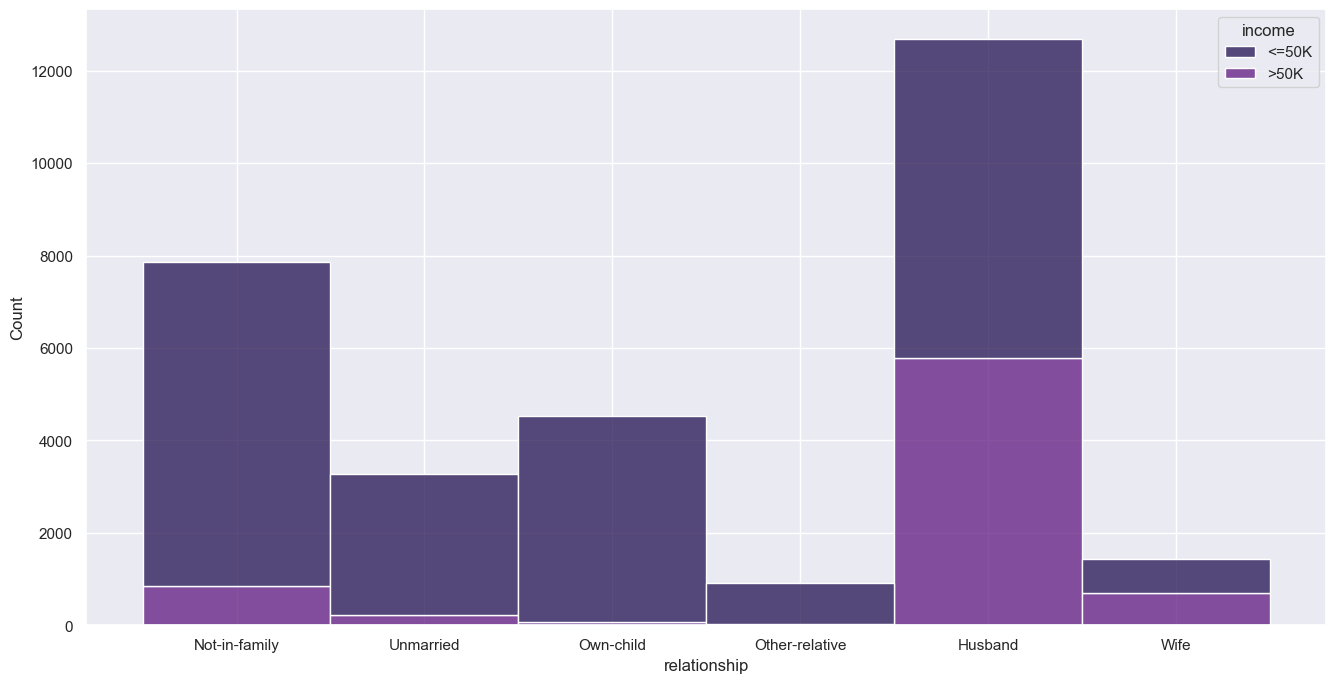

In [42]:
print(census.groupby('relationship').size())
plt.figure(figsize=(16, 8))
sns.histplot(data=census, x='relationship', hue='income', multiple='stack')

race
Amer-Indian-Eskimo      286
Asian-Pac-Islander      973
Black                  2907
Other                   248
White                 26280
dtype: int64


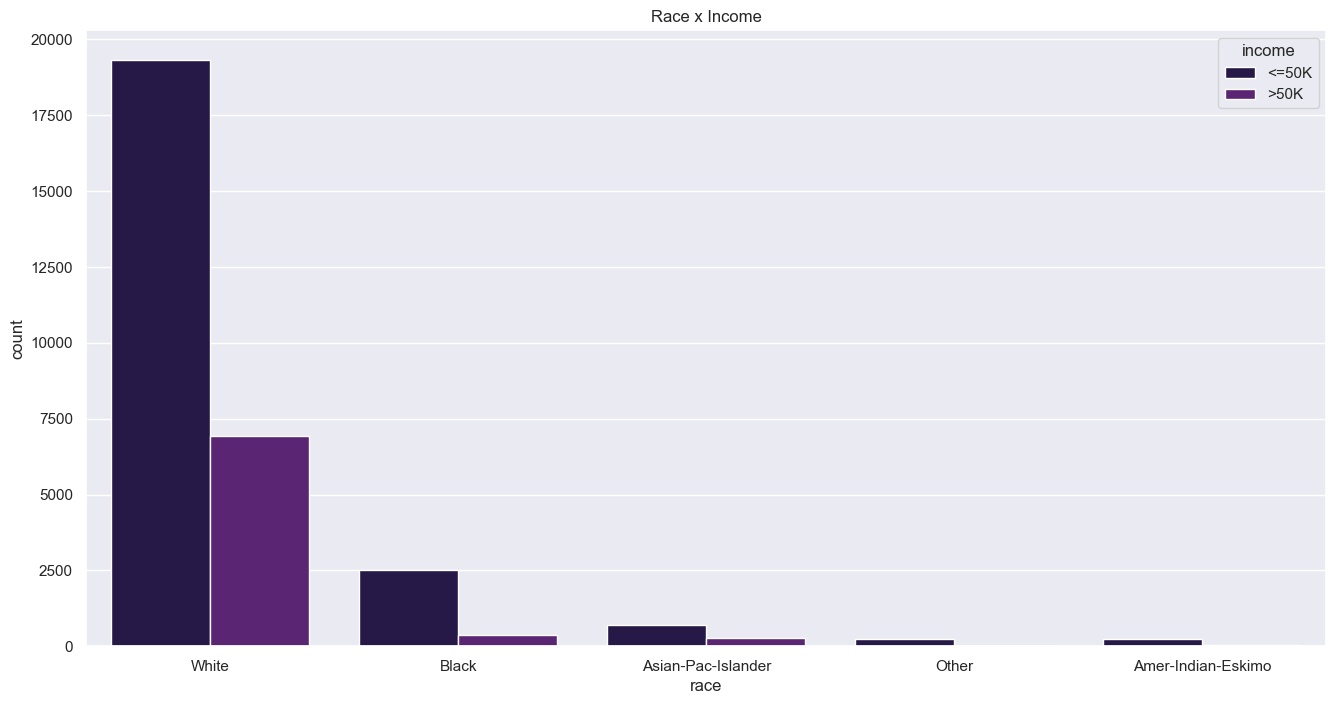

sex
Female     9921
Male      20773
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

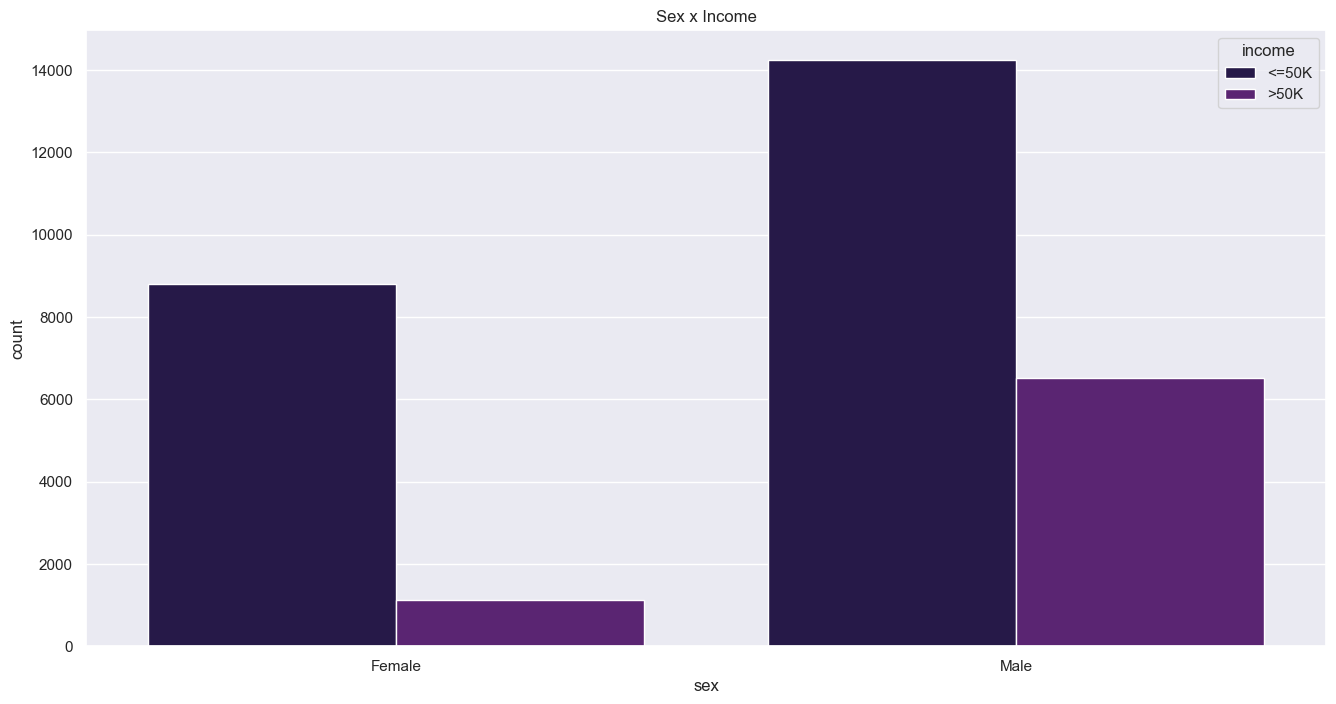

In [43]:
plt.figure(figsize=(16, 8))
print(census.groupby(census.race).size())
sns.countplot(data=census, x='race', hue='income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(census.groupby(census.sex).size())
sns.countplot(data=census, x='sex', hue='income')
plt.title('Sex x Income')

In [44]:
print('**** capital gain **** \n ', census.groupby('capital.gain').size(), '\n')
print('**** capital loss **** \n ', census.groupby('capital.loss').size(), '\n')

**** capital gain **** 
  capital.gain
0        28105
114          6
401          1
594         29
914          8
         ...  
25236       11
27828       33
34095        3
41310        2
99999      155
Length: 118, dtype: int64 

**** capital loss **** 
  capital.loss
0       29233
155         1
213         4
323         3
419         1
        ...  
3004        2
3683        2
3770        2
3900        2
4356        1
Length: 90, dtype: int64 



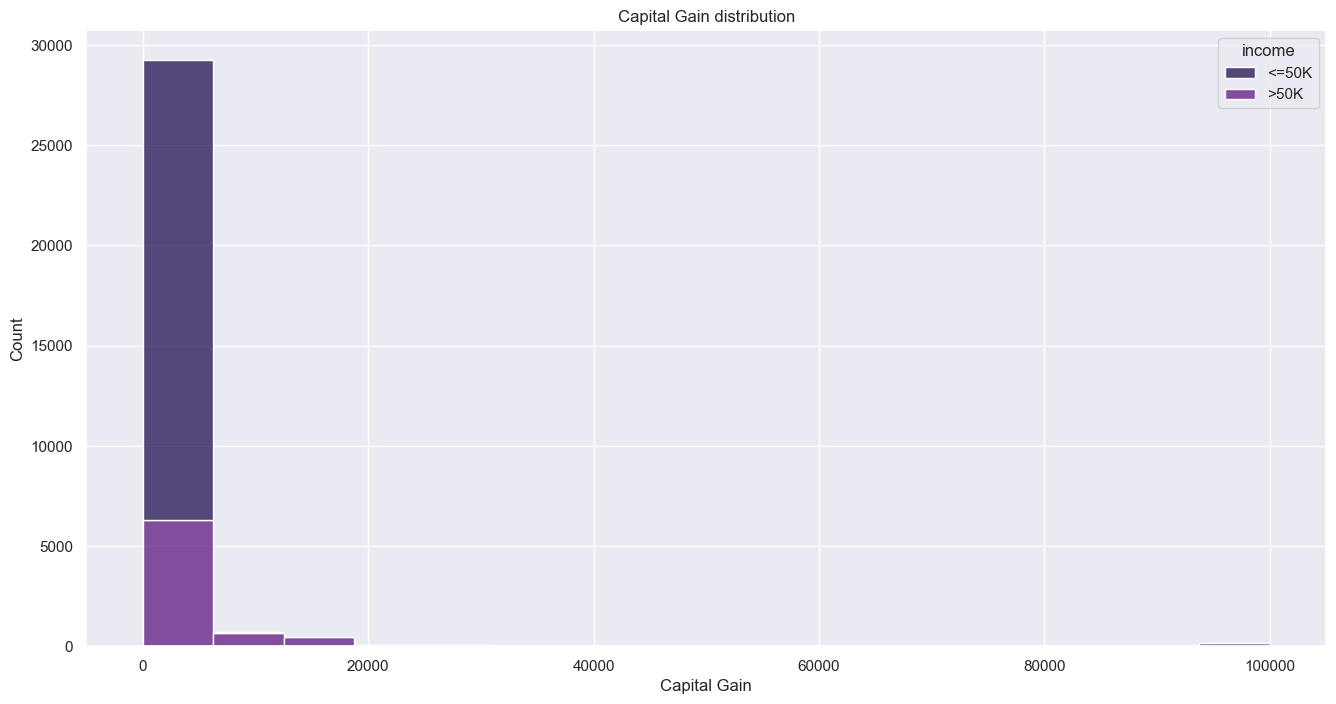

Text(0.5, 0, 'Capital Loss')

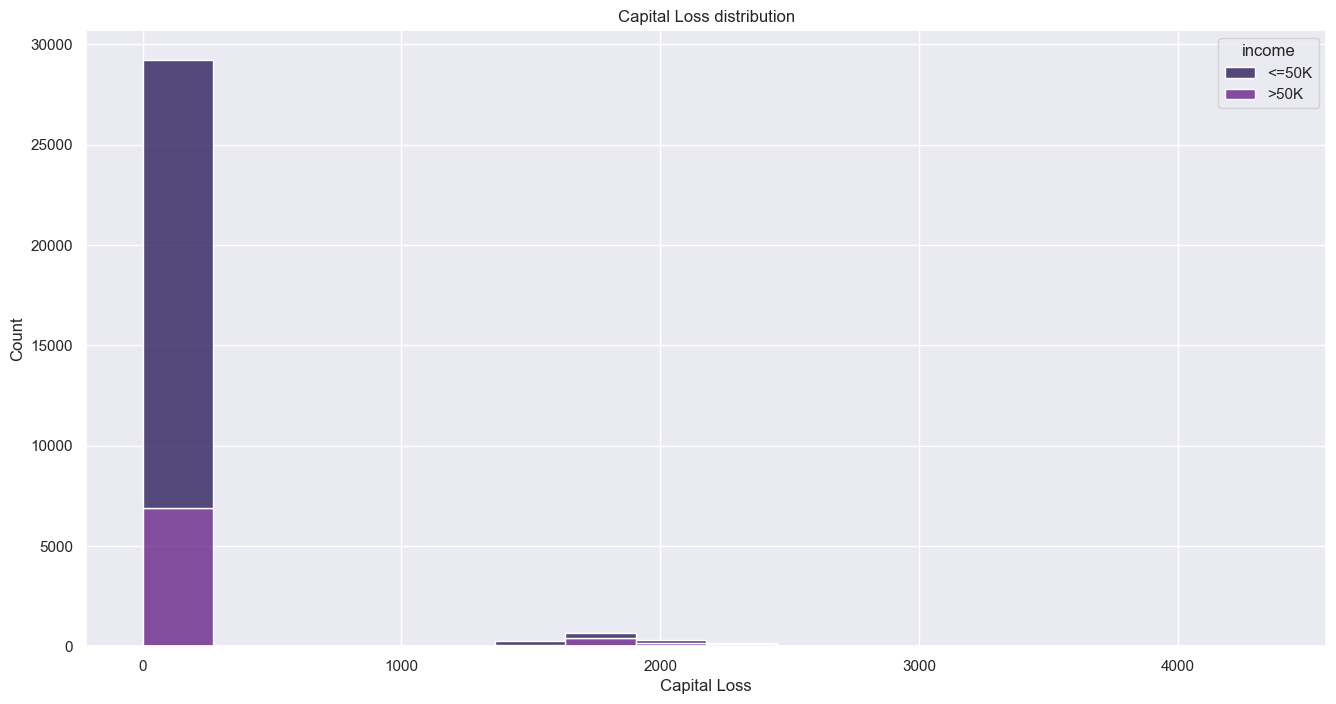

In [45]:
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.gain', data=census, hue='income', multiple='stack')
plt.title('Capital Gain distribution')
plt.xlabel('Capital Gain')
plt.show()
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.loss', data=census, hue='income', multiple='stack')
plt.title('Capital Loss distribution')
plt.xlabel('Capital Loss')

In [46]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [47]:
census.groupby('hours.per.week').size()

hours.per.week
1      8
2     15
3     24
4     28
5     39
      ..
95     2
96     5
97     2
98    11
99    80
Length: 94, dtype: int64

In [48]:
census = census.drop(columns=['hours.per.week'])

In [49]:
census.groupby('native.country').size()

native.country
?                               555
Cambodia                         18
Canada                          107
China                            68
Columbia                         56
Cuba                             92
Dominican-Republic               67
Ecuador                          27
El-Salvador                     100
England                          86
France                           27
Germany                         128
Greece                           29
Guatemala                        61
Haiti                            42
Holand-Netherlands                1
Honduras                         12
Hong                             19
Hungary                          13
India                           100
Iran                             42
Ireland                          24
Italy                            68
Jamaica                          80
Japan                            59
Laos                             17
Mexico                          606
Nicaragua    

([<matplotlib.patches.Wedge at 0x28e62ff22d0>,
 [Text(1.0982257098767156, 0.062452303126338926, '?'),
  Text(1.0926769635963764, 0.12671642839743855, 'Cambodia'),
  Text(1.0909663706824744, 0.1406853867319212, 'Canada'),
  Text(1.0882716045748075, 0.1602027299273451, 'China'),
  Text(1.0861507751849457, 0.1740014182848571, 'Columbia'),
  Text(1.0833904711185112, 0.1904339441633516, 'Cuba'),
  Text(1.0801480310166247, 0.20803901338669392, 'Dominican-Republic'),
  Text(1.078096508189159, 0.2184214253005937, 'Ecuador'),
  Text(1.0751663126581934, 0.23241643686491748, 'El-Salvador'),
  Text(1.070547130189944, 0.2528415354368725, 'England'),
  Text(1.06755128529171, 0.2652060581359678, 'France'),
  Text(1.0632097437090118, 0.2821082077540777, 'Germany'),
  Text(1.0585393982717899, 0.2991560500915825, 'Greece'),
  Text(1.055738796305369, 0.3088941468783292, 'Guatemala'),
  Text(1.0524237487411885, 0.3200066453771607, 'Haiti'),
  Text(1.0510051676771455, 0.32463539165644795, 'Holand-Netherlan

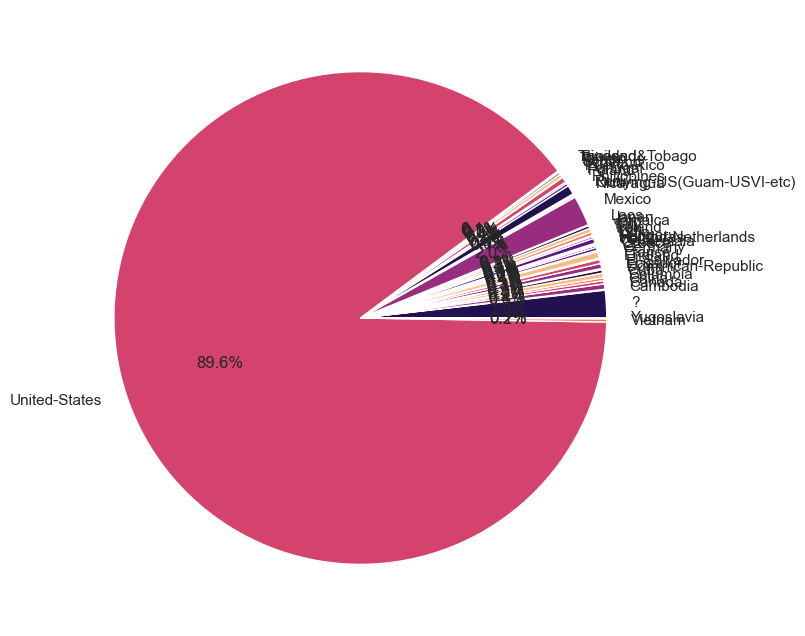

In [50]:
plt.figure(figsize=(16, 8))
plt.pie(census.groupby('native.country').size(), labels=census.groupby('native.country').size().index, autopct='%1.1f%%')

In [51]:
label_encoder = LabelEncoder()
categorical_columns = ['income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
census[categorical_columns] = census[categorical_columns].apply(label_encoder.fit_transform)

In [53]:
census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,39,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,39,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,39,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,39,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,4,1,0,0,39,0
32557,27,2,257302,7,12,2,12,5,4,0,0,0,39,0
32558,40,2,154374,11,9,2,6,0,4,1,0,0,39,1
32559,58,2,151910,11,9,6,0,4,4,0,0,0,39,0


In [54]:
x_train, x_test, y_train, y_test = train_test_split(census.drop(columns=['income']), census['income'], test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**** ACCURACY_SCORE **** 

 0.8537221045772927 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4699
           1       0.72      0.62      0.67      1440

    accuracy                           0.85      6139
   macro avg       0.80      0.77      0.79      6139
weighted avg       0.85      0.85      0.85      6139
 

**** CONFUSION MATRIX ****


<Axes: >

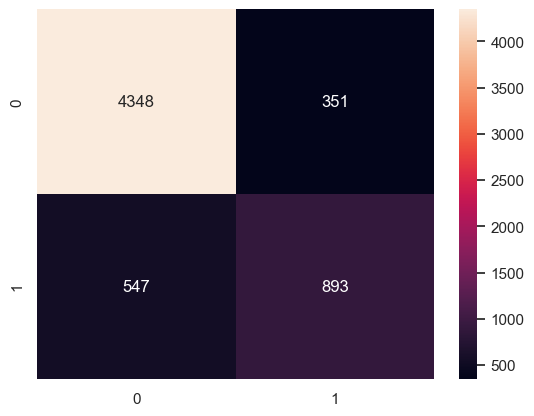

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

**** ACCURACY_SCORE **** 

 0.8705000814464896 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4699
           1       0.76      0.65      0.70      1440

    accuracy                           0.87      6139
   macro avg       0.83      0.79      0.81      6139
weighted avg       0.87      0.87      0.87      6139
 

**** CONFUSION MATRIX ****


<Axes: >

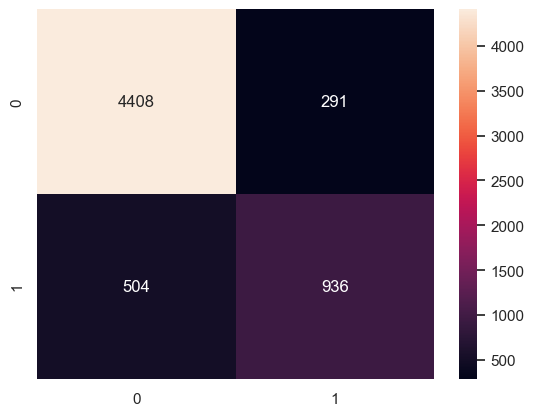

In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

**** ACCURACY_SCORE **** 

 0.8460661345496009 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4699
           1       0.73      0.54      0.62      1440

    accuracy                           0.85      6139
   macro avg       0.80      0.74      0.76      6139
weighted avg       0.84      0.85      0.84      6139
 

**** CONFUSION MATRIX ****


<Axes: >

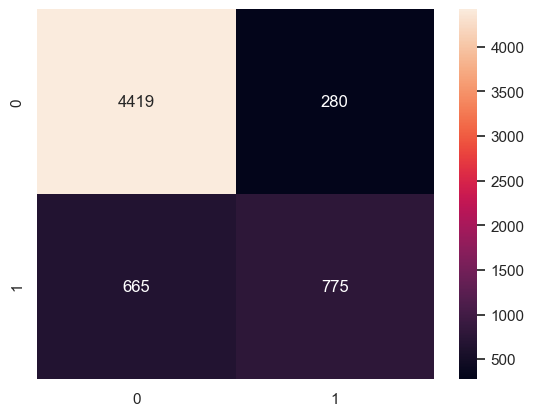

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')